In [55]:
with open('13_01_2025___lab1_cpv.txt', 'r') as file:
    content = file.read()
print(content)

You will use the Augmented Forest Segmentation Dataset available on Kaggle to complete the following tasks. 

Tasks:
1. Data Exploration:
Load the dataset and inspect the images.
Randomly select an image from the dataset. Determine how many bytes are used to store the image.
Explanation: Analyze how the image resolution and brightness influence the storage size. Include a brief discussion on these factors.

2. Weather Classification:
Devise a simple method to classify images into two categories:
Images captured on a good weather day.
Images captured on a bad weather day.
Provide a rationale for your classification method and its limitations.

3. Image Compression:
Implement a compression technique of your choice. For example, reduce the color space (e.g., quantizing colors or converting to grayscale).
Compare the image quality before and after compression using the following metrics:
Peak Signal-to-Noise Ratio (PSNR)
Mean Squared Error (MSE)
Structural Similarity Index (SSIM)
Include a

Selected image: 838669_sat_75.jpg
Image size: 30150 bytes
Size: (256, 256, 3)


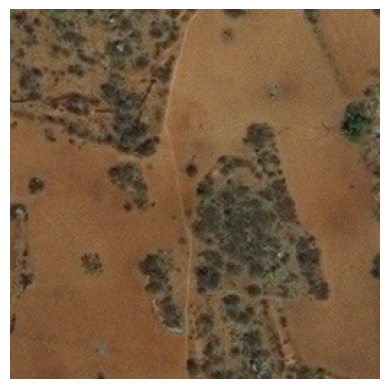

In [56]:
import cv2
import os
import random
import matplotlib.pyplot as plt

image_folder = 'images'

image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

random_image_file = random.choice(image_files)

img_path = os.path.join(image_folder, random_image_file)
img = cv2.imread(img_path)

img_size = os.path.getsize(img_path)
print(f"Selected image: {random_image_file}")
print(f"Image size: {img_size} bytes")
print("Size:", img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [57]:
# Split the image into its 3 color channels
b_channel, g_channel, r_channel = cv2.split(img)

# Calculate the size of each channel
b_size = b_channel.size
g_size = g_channel.size
r_size = r_channel.size

print(f"Blue channel size: {b_size} bytes")
print(f"Green channel size: {g_size} bytes")
print(f"Red channel size: {r_size} bytes")

Blue channel size: 65536 bytes
Green channel size: 65536 bytes
Red channel size: 65536 bytes


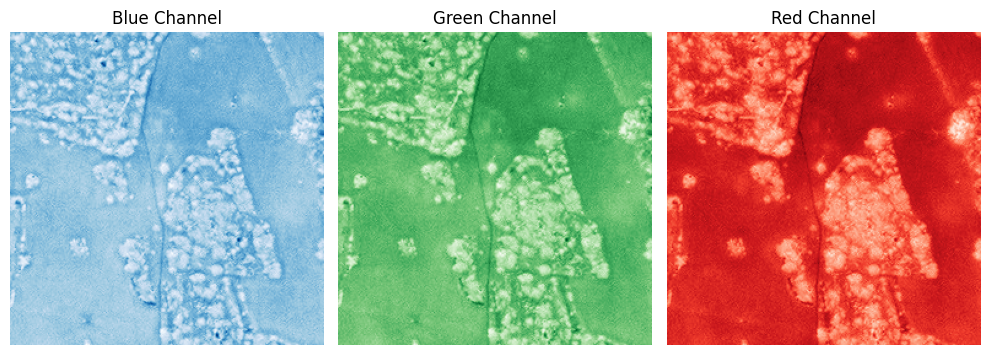

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(b_channel, cmap='Blues')
axes[0].set_title("Blue Channel")
axes[0].axis('off')

axes[1].imshow(g_channel, cmap='Greens')
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(r_channel, cmap='Reds')
axes[2].set_title("Red Channel")
axes[2].axis('off')

plt.tight_layout()
plt.show()

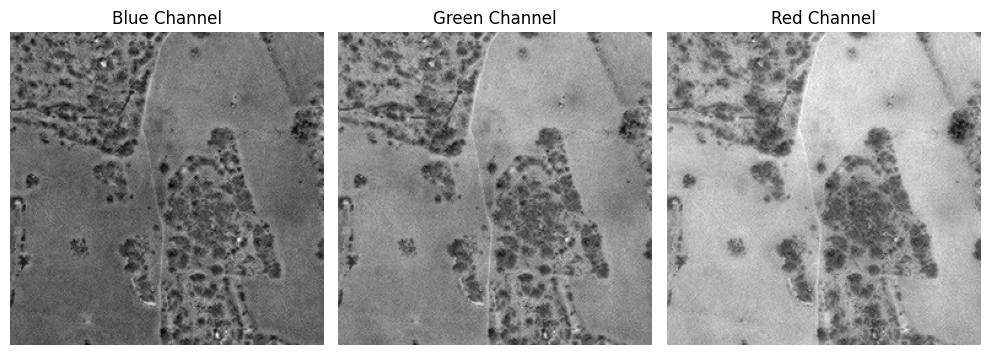

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(b_channel, cmap='gray')
axes[0].set_title("Blue Channel")
axes[0].axis('off')

axes[1].imshow(g_channel, cmap='gray')
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(r_channel, cmap='gray')
axes[2].set_title("Red Channel")
axes[2].axis('off')

plt.tight_layout()
plt.show()

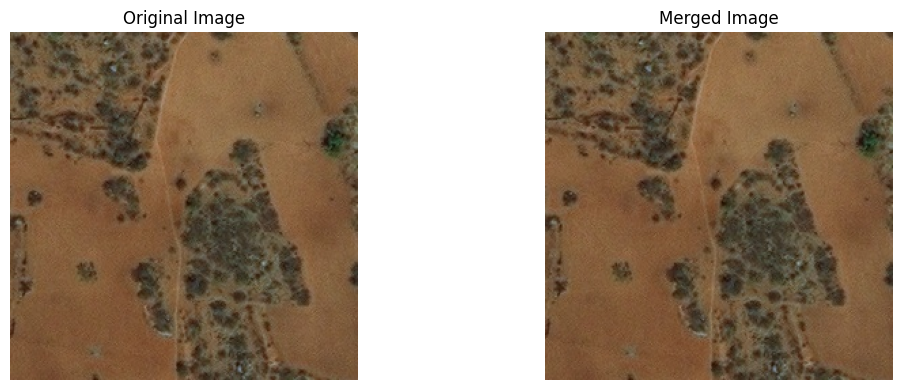

Merged image size (1 channel): 196608 bytes


In [60]:
merge_image = cv2.merge([r_channel, g_channel, b_channel])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(merge_image)
ax2.set_title('Merged Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"Merged image size (1 channel): {merge_image.size} bytes")

In [61]:
# Calculate total size of all channels
total_channels_size = b_size + g_size + r_size

# Compare sizes
print(f"Original image file size: {img_size} bytes")
print(f"Sum of channel sizes: {total_channels_size} bytes")
print(f"Difference: {total_channels_size - img_size} bytes")

# Explanation
print("\nExplanation:")
print("1. The original image is stored in JPEG format which uses compression")
print("2. When we split into channels, we get raw pixel data (uncompressed)")
print(f"3. Each channel is {img.shape[0]} x {img.shape[1]} pixels = {b_size} bytes")
print("4. JPEG compression significantly reduces file size while maintaining visual quality")

Original image file size: 30150 bytes
Sum of channel sizes: 196608 bytes
Difference: 166458 bytes

Explanation:
1. The original image is stored in JPEG format which uses compression
2. When we split into channels, we get raw pixel data (uncompressed)
3. Each channel is 256 x 256 pixels = 65536 bytes
4. JPEG compression significantly reduces file size while maintaining visual quality


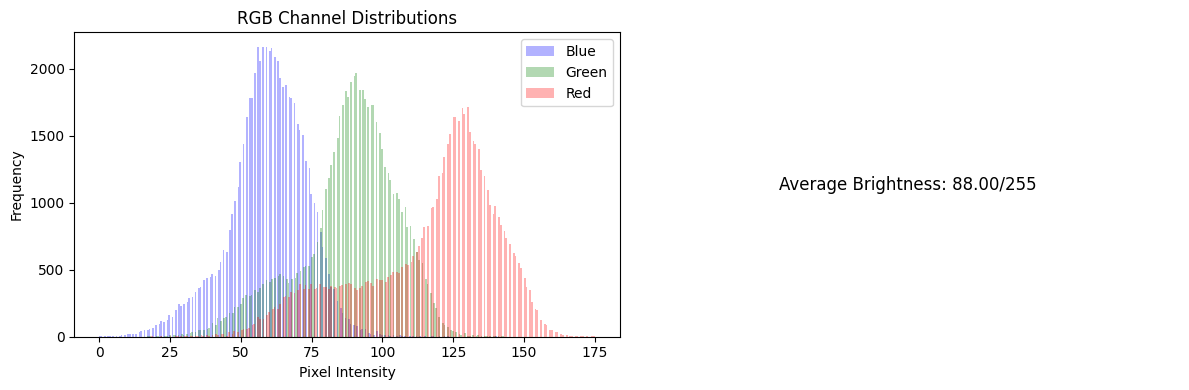

In [62]:
# Calculate average brightness
brightness = (b_channel.mean() + g_channel.mean() + r_channel.mean()) / 3

# Create a histogram of pixel intensities
plt.figure(figsize=(12, 4))

# Plot histograms for each channel
plt.subplot(1, 2, 1)
plt.hist(b_channel.ravel(), bins=256, color='blue', alpha=0.3, label='Blue')
plt.hist(g_channel.ravel(), bins=256, color='green', alpha=0.3, label='Green')
plt.hist(r_channel.ravel(), bins=256, color='red', alpha=0.3, label='Red')
plt.title('RGB Channel Distributions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Show average brightness value
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, f'Average Brightness: {brightness:.2f}/255', 
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

In [67]:
import numpy as np

def calculate_contrast(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contrast = gray.std()
    return contrast

def calculate_color_histogram(image):
    hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

    hist_b = hist_b / hist_b.sum()
    hist_g = hist_g / hist_g.sum()
    hist_r = hist_r / hist_r.sum()

    grayness = np.sum(np.minimum(hist_b, np.minimum(hist_g, hist_r)))
    
    return grayness

def classify_weather(image, brightness_thresh=60, contrast_thresh=10, grayness_thresh=0.4):


    contrast = calculate_contrast(image)
    grayness = calculate_color_histogram(image)

    print(f"Brightness: {brightness:.2f}")
    print(f"Contrast: {contrast:.2f}")
    print(f"Grayness: {grayness:.2f}")

    if brightness > brightness_thresh and contrast > contrast_thresh and grayness < grayness_thresh:
        return "Good weather🌞"
    else:
        return "Bad weather 🌧️"


result = classify_weather(img)
print("Result:", result)

Brightness: 88.00
Contrast: 18.49
Grayness: 0.16
Result: Good weather🌞


In [64]:
merge_image.shape

(256, 256, 3)

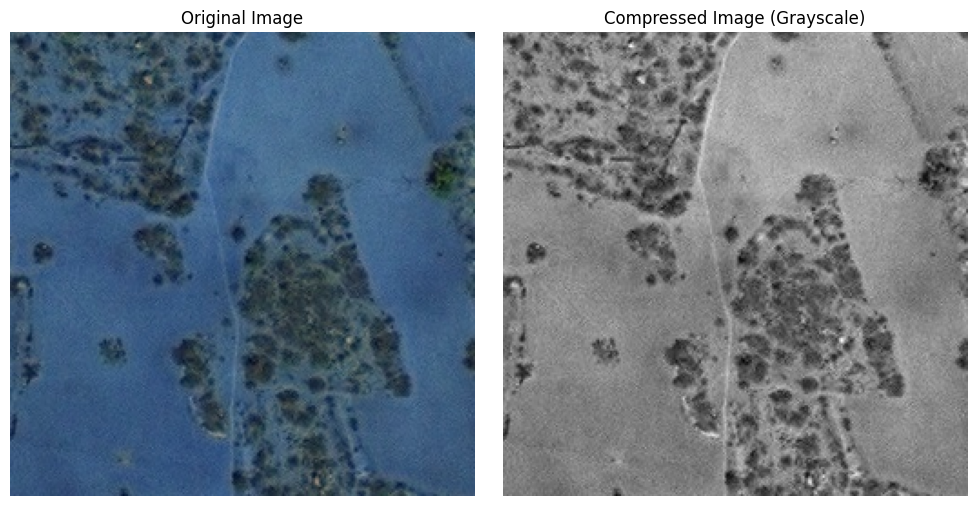

MSE: 624.0178375244141
PSNR: 20.178833567180142 dB
SSIM: 0.2707479488788692
Original Size: 196608 bytes
Compressed Size: 65664 bytes


In [65]:
import numpy as np
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim, mean_squared_error as mse
import matplotlib.pyplot as plt
import sys

# Task: Image Compression by converting to grayscale
compressed_image = cv2.cvtColor(merge_image, cv2.COLOR_BGR2GRAY)

# Reshape compressed image to match original for metrics computation
compressed_image_reshaped = cv2.cvtColor(compressed_image, cv2.COLOR_GRAY2BGR)

# Compute Metrics
mse_value = mse(merge_image, compressed_image_reshaped)
psnr_value = psnr(merge_image, compressed_image_reshaped, data_range=255)
ssim_value = ssim(
    merge_image, compressed_image_reshaped, 
    multichannel=True, win_size=3, data_range=255
)

# Calculate image sizes
original_size = sys.getsizeof(merge_image)
compressed_size = sys.getsizeof(compressed_image)

# Display original and compressed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(merge_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(compressed_image, cmap="gray")
axes[1].set_title("Compressed Image (Grayscale)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Print results
print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value} dB")
print(f"SSIM: {ssim_value}")
print(f"Original Size: {merge_image.size} bytes")
print(f"Compressed Size: {compressed_size} bytes")


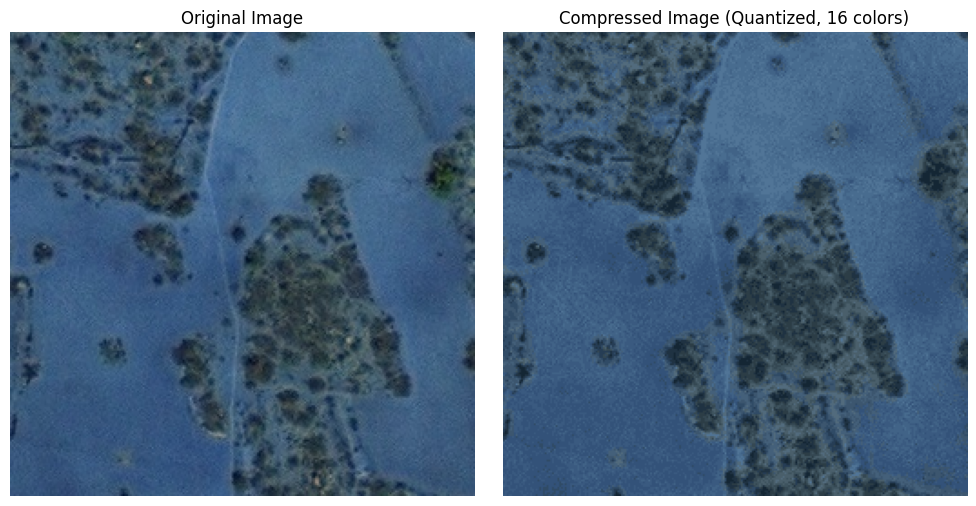

MSE: 17.610758463541668
PSNR: 35.67302300219344 dB
SSIM: 0.9417051924613123
Original Size: 196608 bytes
Compressed Size: 144 bytes


In [66]:
import numpy as np
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim, mean_squared_error as mse
import matplotlib.pyplot as plt
import sys


# Task: Image Compression using Color Quantization (K-Means)
def quantize_image(image, n_colors):
    data = image.reshape((-1, 3))  # Flatten the image
    data = np.float32(data)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(data, n_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    compressed_data = centers[labels.flatten()]
    compressed_image = compressed_data.reshape(image.shape)
    return compressed_image

n_colors = 16  # Number of colors to quantize
compressed_image = quantize_image(merge_image, n_colors)

# Compute Metrics
mse_value = mse(merge_image, compressed_image)
psnr_value = psnr(merge_image, compressed_image, data_range=255)
ssim_value = ssim(
    merge_image,
    compressed_image,
    data_range=255,
    multichannel=True,  # Specify that the image has multiple channels
    win_size=7,         # Window size must be odd and less than the image size
    channel_axis=-1     # Specify the axis of color channels
)
# Calculate image sizes
original_size = sys.getsizeof(merge_image)
compressed_size = sys.getsizeof(compressed_image)

# Display original and compressed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(merge_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f"Compressed Image (Quantized, {n_colors} colors)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Print results
print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value} dB")
print(f"SSIM: {ssim_value}")
print(f"Original Size: {merge_image.size} bytes")
print(f"Compressed Size: {compressed_size} bytes")
